#DOKUMENTASI PROJECT STKI

## **Topik Project dan Identitas Lengkap**

**Topik Project**: menganalisis gambar kartu dengan menggunakan Convolutional Neural Network

**Identitas:**

*   Nama : Afan Tirta Muttaqin
*   Nim : A11.2022.14256
*   Mata Kuliah: Data Maining (A11.4517)




##**Ringkasan dan Permasalahan Project**

**Ringkasan:**
 menaganalisis kartu remi dengan menggunakaa CNN,Kartu remi adalah sekumpulan kartu permainan standar yang terdiri dari 52 kartu, yang dibagi menjadi empat jenis atau "gugus" (suits) utama yaitu sekop,wajik,hati,kriting.Setiap gugus terdiri dari 13 kartu, dengan nilai kartu dari As (A), 2 hingga 10, dan kartu bergambar (Jack, Queen, King).Beberapa set kartu remi juga mencakup 2 kartu joker, yang sering digunakan untuk permainan tertentu atau sebagai kartu tambahan.Kartu remi digunakan dalam berbagai permainan, seperti Poker, Bridge, Solitaire, Uno, dan lainnya.Kartu remi diyakini berasal dari Tiongkok kuno atau India, sebelum akhirnya berkembang menjadi desain modern yang dikenal di Eropa pada abad ke-14. Saat ini, kartu remi digunakan secara luas di seluruh dunia dengan berbagai variasi permainan.

**Permasalahan:**Bagaimana menganalisis sebuah kartu remi yang memiliki empat jenis yaitu sekop,wajik,hati,keriting dengan menampilkan gambar kartu pada kasus ini saya menggunakan algoritma cnn(Convolutional Neural Network)jenis jaringan saraf tiruan yang dirancang khusus untuk memproses data berbentuk grid seperti gambar.

**Tujuan:** Membuat model yang dapat melakukan analisis peluang pada gambar kartu dengan menggunkan algoritma CNN (Convolutional Neural Network)

**BAGAN ALUR**

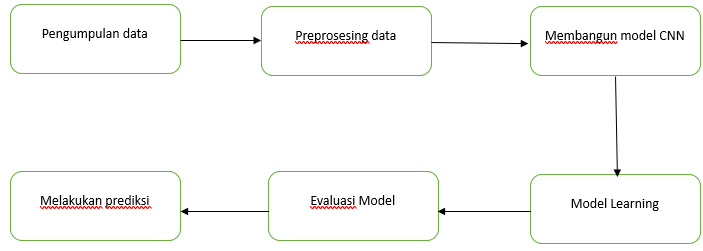

In [12]:
import kagglehub
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from os import listdir

Kodingan diatas ini sebagai libary - libary

In [13]:
# Download dataset

path = kagglehub.dataset_download("gpiosenka/cards-image-datasetclassification")

print("Path to dataset files:", path)

100%|██████████| 385M/385M [00:04<00:00, 101MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2


Blok diatas digunakan untuk mendowload dataset

In [ ]:
metadata = pd.read_csv(f"{path}/cards.csv")

metadata["filepaths"] = path + metadata["filepaths"]

metadata.head()

kodingan diatas untuk menampilkan dataset

In [15]:
print(f"Percentage of training set is { int(len(metadata[metadata['data set'] == 'train'])/len(metadata) * 100)}%")

print(f"Percentage of test set is { int(len(metadata[metadata['data set'] == 'test'])/len(metadata) * 100)}%")

Percentage of training set is 93%
Percentage of test set is 3%


menampilkan peresntase data traing dan tes

In [17]:
#List classes

class_names = listdir(path+"/train")



#Load datasets

train_ds = tf.keras.utils.image_dataset_from_directory(f"{path}/train", batch_size = 32, image_size = (224, 224), shuffle = True)

validation_ds = tf.keras.utils.image_dataset_from_directory(f"{path}/valid", batch_size = 32, image_size = (224, 224), shuffle = True)

test_ds = tf.keras.utils.image_dataset_from_directory(f"{path}/test", batch_size = 32, image_size = (224, 224), shuffle = True)

Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Found 265 files belonging to 53 classes.


berisi daftar kelas dan Dataset untuk training, validasi, dan pengujian yang telah disiapkan dalam format yang kompatibel dengan TensorFlow, dengan gambar berukuran seragam 224x224 dan dalam batch tertentu 32 gambar per batch

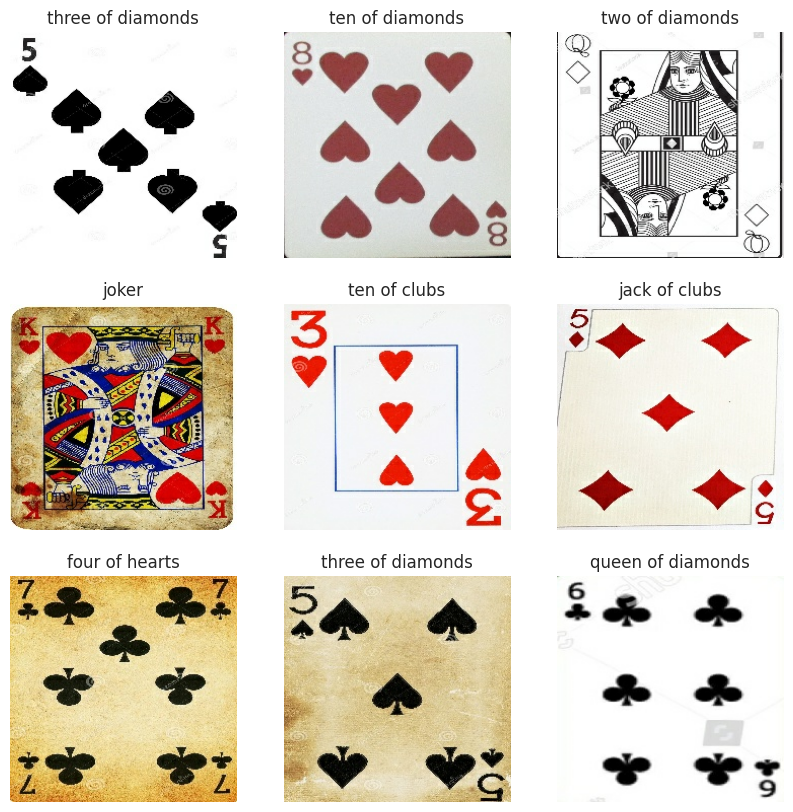

In [18]:
#Show images

plt.figure(figsize=(10,10))

for images, labels in test_ds.take(1):

    for i in range(9):

        plt.subplot(3, 3, i+1)

        plt.imshow(images[i].numpy().astype("uint8"))

        plt.title(class_names[labels[i]])

        plt.axis("off")

plt.show()

menampilkan gambar kartu pada dataset




In [27]:
model = tf.keras.models.Sequential([

  tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),

    tf.keras.layers.Conv2D(16, 3, activation='relu'),

    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),

    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),

    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(128, activation="relu"),

  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Dense(len(class_names), activation='softmax'),
])


membangun model LStM(Long short-Term Memory)

*   Activation 'ReLU':Fungsi aktivasi ReLU digunakan untuk memperkenalkan non-liniearity pada model
*   Activation 'softmax':fungsi aktivasi yang sering digunakan pada layer output untuk tugas klasifikasi multi-kelas.



In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy']
)

In [24]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


history = model.fit(train_ds, validation_data=validation_ds, epochs=20, callbacks=[
                 EarlyStopping(
                    monitor='loss',
                    patience=5,
                    restore_best_weights=True
                )
             ]
)

Epoch 1/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - accuracy: 0.1329 - loss: 3.6130 - val_accuracy: 0.4453 - val_loss: 2.9656
Epoch 2/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 437s 2s/step - accuracy: 0.5122 - loss: 2.2693 - val_accuracy: 0.5925 - val_loss: 2.0981
Epoch 3/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 426s 2s/step - accuracy: 0.7259 - loss: 1.6291 - val_accuracy: 0.6528 - val_loss: 1.6587
Epoch 4/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 424s 2s/step - accuracy: 0.8566 - loss: 1.1277 - val_accuracy: 0.7019 - val_loss: 1.3676
Epoch 5/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - accuracy: 0.9425 - loss: 0.7163 - val_accuracy: 0.7057 - val_loss: 1.2995
Epoch 6/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 440s 2s/step - accuracy: 0.9735 - loss: 0.4572 - val_accuracy: 0.7245 - val_loss: 1.2033
Epoch 7/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 444s 2s/step - accuracy: 0.9901 - loss: 0.2870 - val_accuracy: 0.7472 - val_loss: 1.1010
Epoch 8/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 437s 2s/step - accuracy: 0.9963 - loss: 0.1858 - val_accu

Pelatihan model dengan mengggunakan 20 epoch

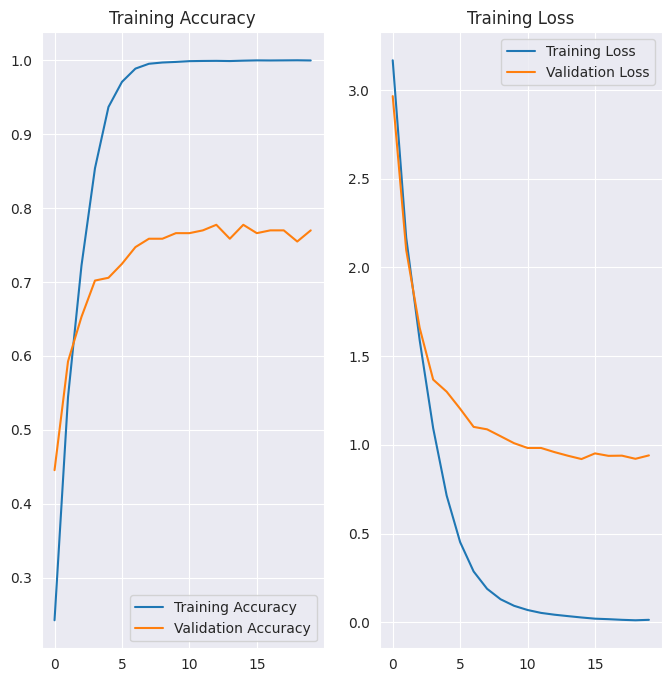

In [25]:
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)

plt.plot(range(len(history.history['loss'])), history.history['accuracy'], label='Training Accuracy')

plt.plot(range(len(history.history['loss'])), history.history['val_accuracy'], label='Validation Accuracy')

plt.legend(loc='lower right')

plt.title('Training Accuracy')



plt.subplot(1, 2, 2)

plt.plot(range(len(history.history['loss'])), history.history['loss'], label='Training Loss')

plt.plot(range(len(history.history['loss'])), history.history['val_loss'], label='Validation Loss')

plt.legend(loc='upper right')

plt.title('Training Loss')



#pd.DataFrame(history.history).plot(grid=True)



plt.show()

pada bagian ini yaitu melakukan tes performa pada label Training loss dan validation loss sert menampilkan grafik tersebut

In [26]:
test_ds= test_ds.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)

model.evaluate(test_ds, verbose=2)

9/9 - 9s - 1s/step - accuracy: 0.7585 - loss: 0.9873


[0.9872590899467468, 0.7584905624389648]

Mengevaluasi model

